# Supervised Learning Regression Project: Cars4U

## Problem Statement

### Business Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below. 

**Data Dictionary** 

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Importing necessary libraries

In [86]:
# import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Loading the dataset

In [129]:
# import data from /datasets using read_csv()
df = pd.read_csv('datasets/used_cars_data.csv')

## Data Overview

- Observations
- df.shape presents 7253 rows and 14 columns
- There is some missing data (by column):
    - Price missing values: 1234
    - Power missing values: 175
    - Seats missing values: 53
    - Engine missing values: 46
    - Mileage missing values: 2
- Sanity checks

In [130]:
# run shape to understand count of rows and columns
df.shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.\n\n') 

# understand if there is any missing data using df.info()
df.info()

# display columns with missing data, count total, and sort from largest to smallest
df.isnull().sum().sort_values(ascending = False)

There are 7253 rows and 14 columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
dtype: int64

In [131]:
# run head to get a sense of values in the dataset
df.head()


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the pricing of used cars distributed?
2. What is the market share of different brands in the used car market?
3. What is the market share of different types of fuels in the used car market?
4. How does the prices of used cars vary by car brand?
5. How does the prices of used cars vary by location?
6. What are the attributes that have a strong correlation with the price of used cars? 



## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## Missing Value Treatment
- Price is missing 1234 values
- Because Price is the target or dependent variable, it is generally preferred to drop those rows
- Because Price has the most missing values, once values have been dropped, a second pass will be made on the dataset to determine how many additional values are missing

In [132]:
# Missing value treatment
# Keep in mind the following: 
# It is generally preferred to drop the missing values in the target variable.
# It is generally preferred to impute the missing values in the independent variables using a suitable strategy.
# For an unskewed numerical variable, the mean of the variable can be used to impute missing values.
# For a skewed numerical variable, the median of the variable can be used to impute missing values.
# For a categorical variable, the most frequent value can be used to impute missing values.



# Review missing values for Price - Price is the target variables
# There are 1234 missing rows
df[df.Price.isna()]

# run dropna with subset against price
df.dropna(subset = ['Price'], inplace = True)

# re-run df.info to validate the Price column is no longer missing data
df.info()

# re-run sorted list of missing values
print("\n", df.isnull().sum().sort_values(ascending = False))

# re-run shape to review how many rows remain
print(f'\nThere are {df.shape[0]} rows and {df.shape[1]} columns.') 

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5876 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          6019 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 705.4+ KB

 Power                143
Seats                 42
Engine        

## Additional Missing Value Treatment

To select the most appropriate treatment method for Powe, Seats, Engine, and Mileage we need to perform some additional steps:
- Transform columns with string values to numerical
- Understand how data values are distributed for columns with missing data
- After removing Price NaN values there are some columns that still have missing values
- Power is missing 143 values and requires transformation
- Seats is missing 42 values and does not require transformation
- Engine is missing 36 values and requires transformation
- Mileage is missing 2 values and requires transformation

## Feature Engineering
- Mileage, Engine, and Power are all string values
- Before distribution of numerical values can be analyzed, the data values need to be converted to numerical values
- Run a function that strips out character data from each column and returns a float

In [133]:
# Remove columns not used in the model - 'S.No.
# Remove S.No
if 'S.No.' in df.columns:
    df.drop(['S.No.'], axis = 1, inplace = True)
    
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [134]:
# Feature Engineering
# we need to transform columns with string data to numerical data
# we need to remove any string or characters from numerical columns
# for example mileage, engine, and power



# capture columns to be transformed: mileage, engine, and power
spec_cols = ['Mileage', 'Engine', 'Power']


def spec_to_num(spec_val):
    """ This function checks if a column in spec_cols is a string
        Then the function strips away specific characters observed in column data values
        Then the function returns a float for the value
        If the value is not a string, a np.nan is returned
        Don't run the function on the columns after transformation has occurred
    """
    if isinstance(spec_val, str):
        return float(spec_val.replace('km/kg', '').replace('kmpl', '').replace('CC', '').replace('bhp', ''))
    else:
        return np.nan
    
for colname in spec_cols:
    df[colname] = df[colname].apply(spec_to_num)
    
df[spec_cols].head()

,Mileage,Engine,Power
0,26.60,998.0,58.16
1,19.67,1582.0,126.20
2,18.20,1199.0,88.70
3,20.77,1248.0,88.76
4,15.20,1968.0,140.80


## EDA on Columns Requiring Additional Missing Value Treatment
- Run histplot against Mileage, Engine, Power, Seats to understand skewness
- Run boxplot against each to get a sense of outliers

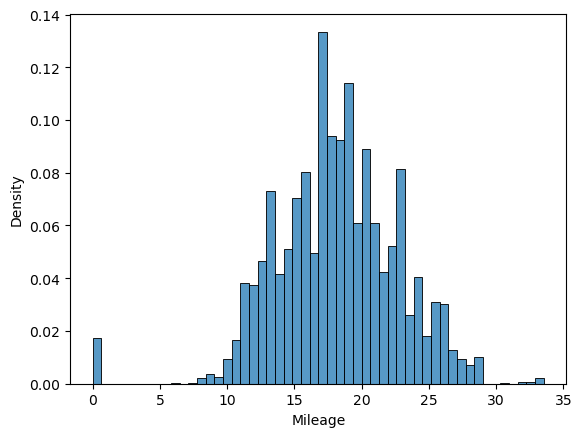

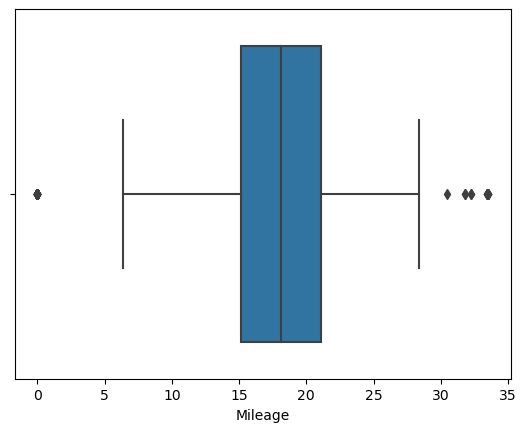

In [135]:
# Run histplot against Mileage
# Mileage is not skewed, use mean
sns.histplot(data = df, x = 'Mileage', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'Mileage')
plt.show()

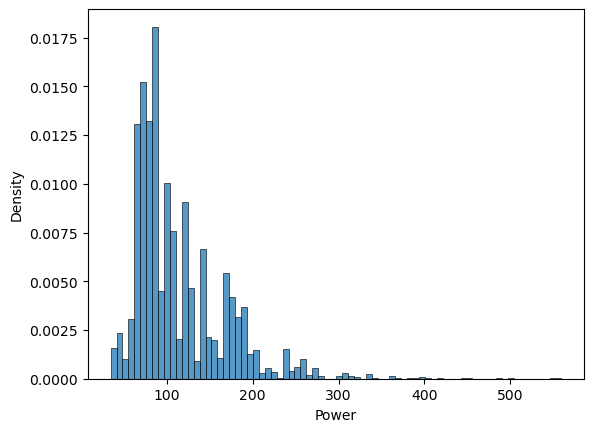

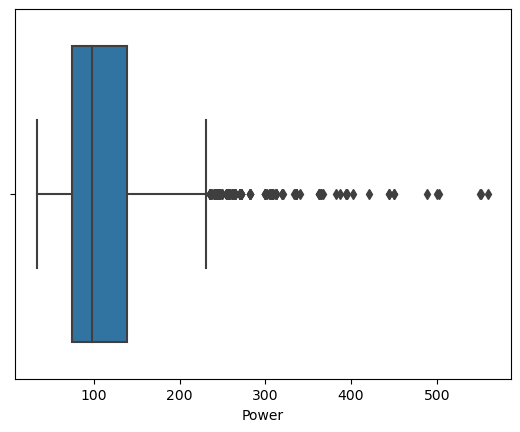

In [136]:
# Run histplot against Power
# Power is skewed, use median
sns.histplot(data = df, x = 'Power', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'Power')
plt.show()

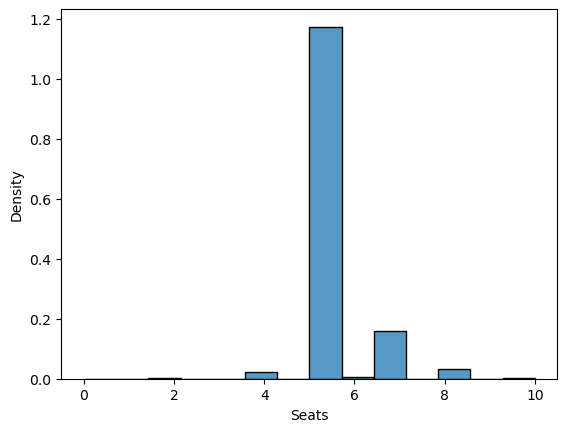

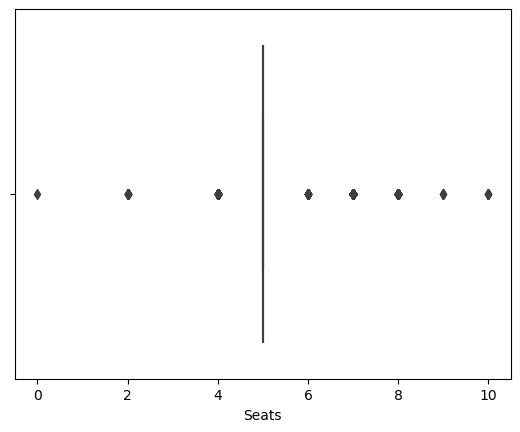

In [137]:
# Run histplot against Seats
# Seats is not skewed, use median
sns.histplot(data = df, x = 'Seats', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'Seats')
plt.show()

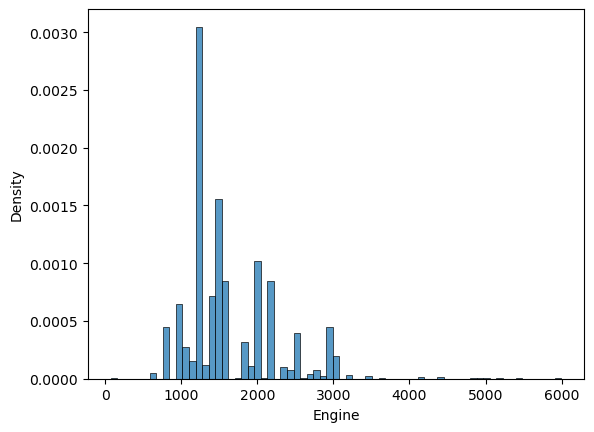

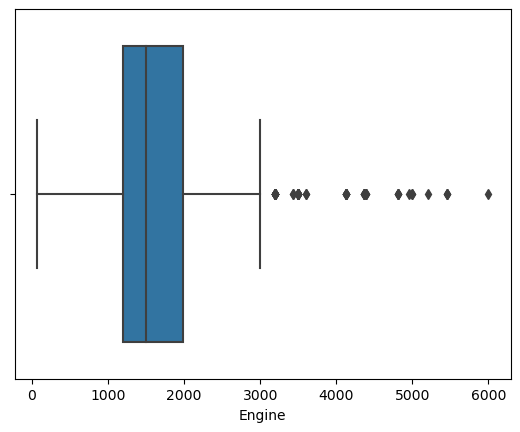

In [138]:
# Run histplot against Engine
# Engine is skewed, use median
sns.histplot(data = df, x = 'Engine', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'Engine')
plt.show()

In [139]:
# Missing Value Treatment
# Power - median
# Seats - median
# Engine - median
# Mileage - mean


# Replace missing values for Power with median
df['Power'] = df['Power'].fillna(df['Power'].median())

# Replace missing values for Seats with median
df['Seats'] = df['Seats'].fillna(df['Seats'].median())

# Replace missing values for Engine with median
df['Engine'] = df['Engine'].fillna(df['Engine'].median())

# Replace missing values for Mileage with mean
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())

# Validate there are no additional data values missing
df.info()

# re-run sorted list of missing values
print("\n", df.isnull().sum().sort_values(ascending = False))

# All Clear!

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB

 Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type           

Questions:
1. How is the pricing of used cars distributed?
2. What is the market share of different brands in the used car market?
3. What is the market share of different types of fuels in the used car market?
4. How does the prices of used cars vary by car brand?
5. How does the prices of used cars vary by location?
6. What are the attributes that have a strong correlation with the price of used cars?

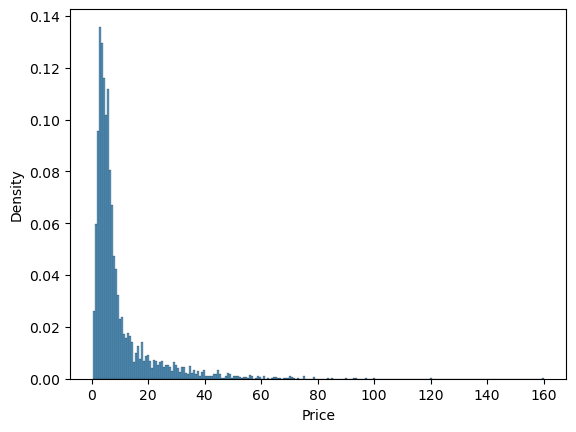

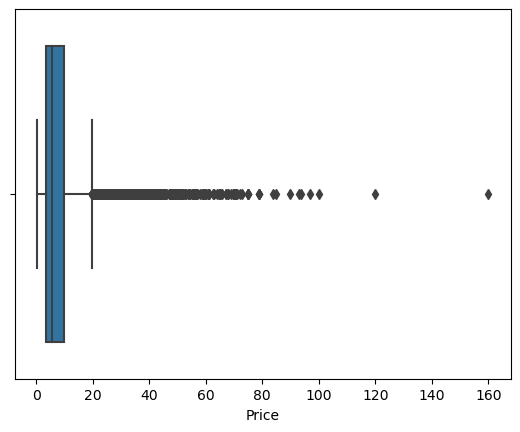

In [140]:
# How is pricing of used cars distributed?
# Run histplot against Price
sns.histplot(data = df, x = 'Price', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'Price')
plt.show()

#df[df['Price'] == 160.0]
#df[df['Price'] > 60.0]

In [141]:
# Understand Brand market share

# Feature engineering - create a column named Brand
# Split Name string by ' ' separator and then extract the first value
if 'Name' in df.columns:
    df['Brand'] = df.Name.str.split(' ').str[0]

# Remove Name to simpify the dataset
if 'Name' in df.columns:
    # Remove Name to simpify the dataset
    df.drop(['Name'], axis = 1, inplace = True)

# verify this is complete with head
df.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,Audi
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,10.25,2.35,Hyundai
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.47,3.50,Nissan
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50,Toyota
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.23,5.20,Volkswagen
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,7.63,1.95,Tata


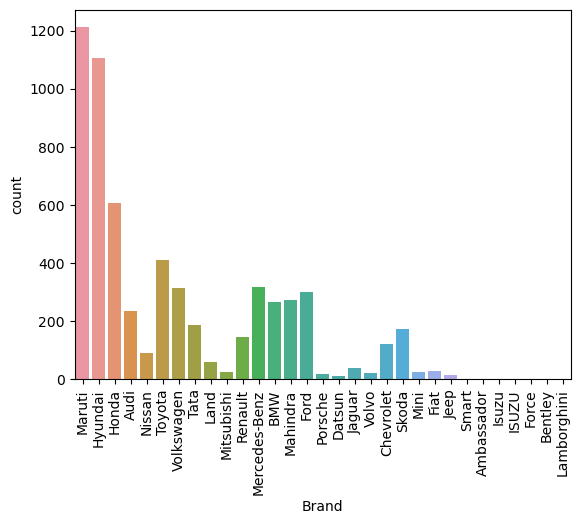

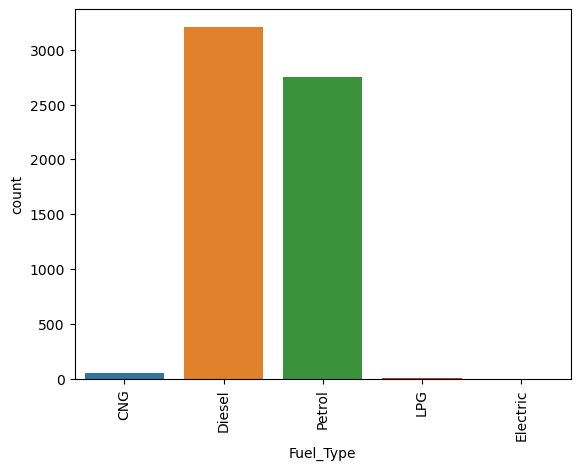

In [142]:
# Market Share Per Brand
sns.countplot(data = df, x = 'Brand')
plt.xticks(rotation=90)
plt.show()

# Market share for fuel types
sns.countplot(data = df, x = 'Fuel_Type')
plt.xticks(rotation=90)
plt.show()


In [143]:
# Capture Value Counts for Brain and Fuel_Type
df.Brand.value_counts()

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

In [144]:
# Capture Value Counts for Fuel_Type
df.Fuel_Type.value_counts()

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: count, dtype: int64

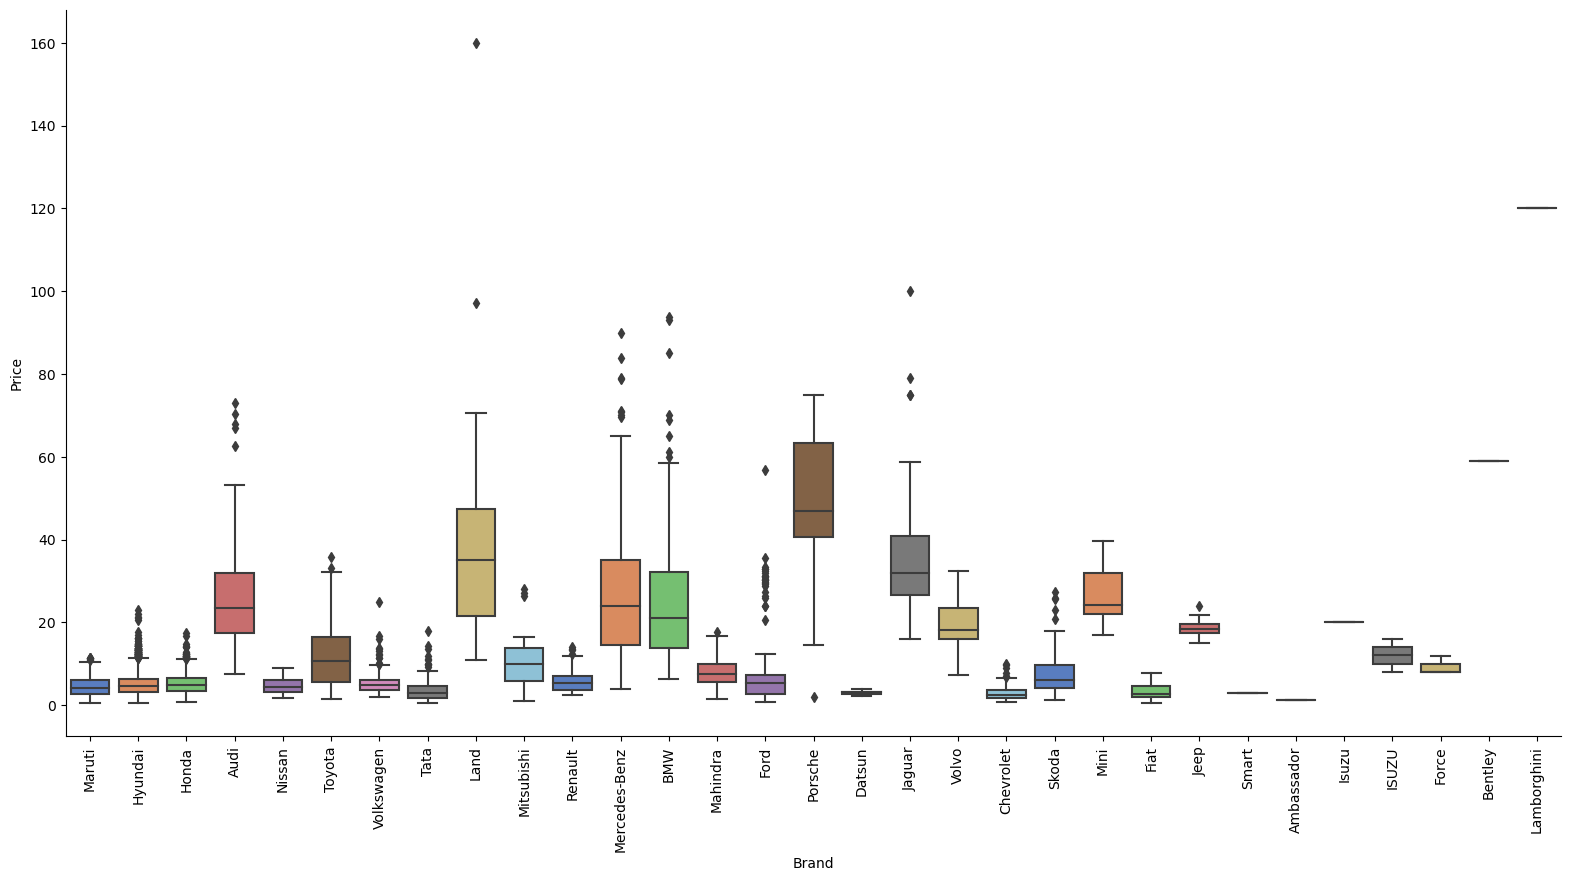

In [101]:
# How does price vary by brand?
sns.catplot(data=df, x="Brand", y="Price", 
            kind='box', palette = 'muted', height = 8, aspect = 2)
plt.xticks(rotation=90)
plt.show()

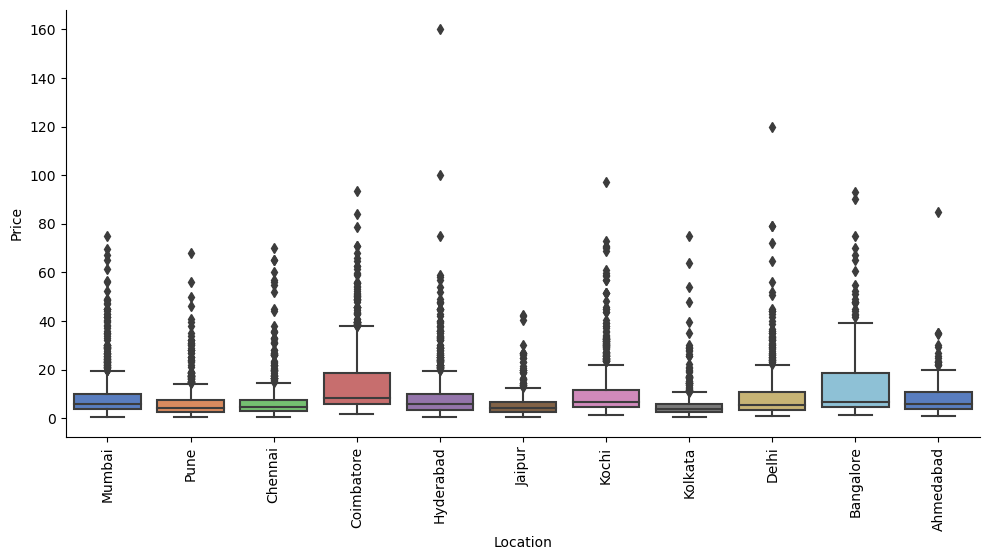

In [102]:
# How does price vary by location?
sns.catplot(data=df, x="Location", y="Price", 
            kind='box', palette = 'muted', height = 5, aspect = 2)
plt.xticks(rotation=90)
plt.show()

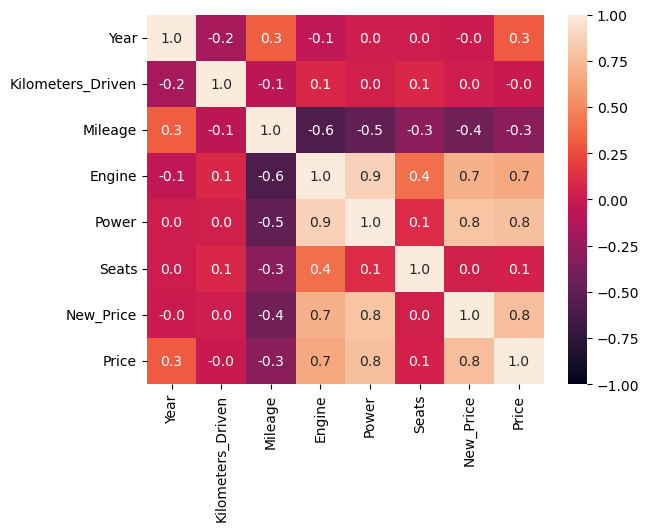

In [147]:
# Output correlations of numerical columns
# Year, Kilometers_Driven, Mileage, Engine, Power, Seats, New_Price

# Collect all columns with a numerical value
num_cols = df[['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']]

# Observe correlation matrix
num_cols.corr()

# Output pairplot
# Investigate relationships between data
# run pairplot to display relationships between numerical variables
sns.heatmap(data = num_cols.corr(), 
            annot = True, 
            vmin = -1.0, 
            vmax = 1.0,
            fmt = '.1f')
plt.show()

# Engine, Power, New_Price

## Data Preprocessing - Outlier Handing
- Boxplot displays a number of outliers for Price that may skew the data
- There is a Lamborghini, Bentley, and Land Rover that have some right skewed data
- Understand if it makes sense to remove some outliers for Price
- Or keep data and run a log transformation against the data

In [104]:
# Price is right skewed
# Values higher than 20 register as outliers in the boxplot
# Capture quartiles and interquartile range
quartiles = np.quantile(df['Price'][df['Price'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
power_8iqur = 8 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers = df.loc[np.abs(df['Price'] - df['Price'].median()) > power_4iqr, 'Price']
outlier_powers

Q1 = 3.5, Q3 = 9.95, 4*IQR = 25.799999999999997


67       35.67
92       39.58
134      54.00
148      37.00
168      45.00
         ...  
5919    100.00
5921     36.00
5927     45.52
5946     48.00
6008     45.00
Name: Price, Length: 324, dtype: float64

## Data Preprocessing - Standardization
- Numerical values need to be standardized 
- Run StandardScaler
- Store standardized values in a DataFrame that will be used 

In [105]:
# Create a Scaler
std_scaler = StandardScaler()

# Standardize and drop numerical columns
#  Year, Kilometers_Driven, Mileage, Engine, Power, Seats, New_Price

df_std = df.copy()

# standardize Year
df_std['Year_z_std'] = std_scaler.fit_transform(df[['Year']])


# standardize Kilometers_Driven
df_std['Kilometers_Driven_z_std'] = std_scaler.fit_transform(df[['Kilometers_Driven']])

# standardize Mileage
df_std['Mileage_z_std'] = std_scaler.fit_transform(df[['Mileage']])

# standardize Engine
df_std['Engine_z_std'] = std_scaler.fit_transform(df[['Engine']])

# standardize Power
df_std['Power_z_std'] = std_scaler.fit_transform(df[['Power']])

# standardize Seats
df_std['Seats_z_std'] = std_scaler.fit_transform(df[['Seats']])

# standardize New_Price
df_std['New_Price_std'] = std_scaler.fit_transform(df[['New_Price']])

# standardize Price
df_std['Price_std'] = std_scaler.fit_transform(df[['Price']])


# drop columns from df_std
if 'Year' in df_std.columns:
    df_std.drop(['Year'], axis = 1, inplace = True)
    
if 'Kilometers_Driven' in df_std.columns:
    df_std.drop(['Kilometers_Driven'], axis = 1, inplace = True)
    
if 'Mileage' in df_std.columns:
    df_std.drop(['Mileage'], axis = 1, inplace = True)
    
if 'Engine' in df_std.columns:
    df_std.drop(['Engine'], axis = 1, inplace = True)
    
if 'Power' in df_std.columns:
    df_std.drop(['Power'], axis = 1, inplace = True)
    
if 'Seats' in df_std.columns:
    df_std.drop(['Seats'], axis = 1, inplace = True)
    
if 'New_Price' in df_std.columns:
    df_std.drop(['New_Price'], axis = 1, inplace = True)
    
if 'Price' in df_std.columns:
    df_std.drop(['Price'], axis = 1, inplace = True)
    

In [106]:
# validations
df_std.head()
#df.head()
df_std.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 6019 non-null   object 
 1   Fuel_Type                6019 non-null   object 
 2   Transmission             6019 non-null   object 
 3   Owner_Type               6019 non-null   object 
 4   Brand                    6019 non-null   object 
 5   Year_z_std               6019 non-null   float64
 6   Kilometers_Driven_z_std  6019 non-null   float64
 7   Mileage_z_std            6019 non-null   float64
 8   Engine_z_std             6019 non-null   float64
 9   Power_z_std              6019 non-null   float64
 10  Seats_z_std              6019 non-null   float64
 11  New_Price_std            6019 non-null   float64
 12  Price_std                6019 non-null   float64
dtypes: float64(8), object(5)
memory usage: 658.3+ KB


## Data Preprocessing - One Hot Encoding
- There are a number of categorical variables like Location that have an impact on Price
- To retain the categorical variables, and allow integration with the Linear Regression model, get_dummies will be run against categorical variables
- Location, Fuel_Type, Transmission, Owner_Type, Brand

In [107]:
# Run get_dummies against Categorical variables
# Run against df and df_std

# get_dummies against Location
df = pd.get_dummies(data = df, columns=['Location'], drop_first = False, dtype = int)
df_std = pd.get_dummies(data = df_std, columns=['Location'], drop_first = False, dtype = int)

# get_dummies against Fuel_Type
df = pd.get_dummies(data = df, columns=['Fuel_Type'], drop_first = False, dtype = int)
df_std = pd.get_dummies(data = df_std, columns=['Fuel_Type'], drop_first = False, dtype = int)

# get_dummies against Transmission
df = pd.get_dummies(data = df, columns=['Transmission'], drop_first = False, dtype = int)
df_std = pd.get_dummies(data = df_std, columns=['Transmission'], drop_first = True, dtype = int)

# get_dummies against Owner_Type
df = pd.get_dummies(data = df, columns=['Owner_Type'], drop_first = False, dtype = int)
df_std = pd.get_dummies(data = df_std, columns=['Owner_Type'], drop_first = False, dtype = int)

# get_dummies against Brand
df = pd.get_dummies(data = df, columns=['Brand'], drop_first = False, dtype = int)
df_std = pd.get_dummies(data = df_std, columns=['Brand'], drop_first = False, dtype = int)

## Data Preprocessing - Log Transformation of Price
- Price is right skewed
- Values higher than 20 are considered outliers in the boxplot for Price
- 324 values for Price are outside of 4 * IQR
- Try log transformation of the data

In [108]:
# copy df into df_logp
df_logp = df.copy()

# Run log transform of Price for df_logp
df_logp['Price'] = np.log(df_logp['Price'])

df_logp.head()
df_logp.shape
df['Price']
df_logp['Price']

0       0.559616
1       2.525729
2       1.504077
3       1.791759
4       2.875822
          ...   
6014    1.558145
6015    1.386294
6016    1.064711
6017    0.974560
6018    0.916291
Name: Price, Length: 6019, dtype: float64

## Data Preprocessing - Train Test Split
- Next the data will be split between training and test datasets
- train_test_split will be used with .8 training and random_state = 1

In [109]:
# store x and x_std and y and y_std by copying Price and Price_std to y and y_std respectively
# copy remaining features to X and X_std respectively
y = df[['Price']]
y_std = df_std[['Price_std']]
y_logp = df_logp['Price']

# Copy all independent variables into an X variable
X = df.drop(['Price'], axis = 1)
X_std = df_std.drop(['Price_std'], axis = 1)
X_logp = df_logp.drop(['Price'], axis = 1)



In [110]:
# run train test split against X, y and X_std, y_std
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

# Mix standardized X with log of price
X_std_train, X_std_test, y_std_train, y_std_test = train_test_split(X_std, y_logp,
                                                                    train_size = 0.8, 
                                                                    random_state = 1) # readability
X_logp_train, X_logp_test, y_logp_train, y_logp_test = train_test_split(X_logp, y_logp,
                                                                    train_size = 0.8, 
                                                                    random_state = 1) # readability


## Model Building - Linear Regression

In [119]:
# train and fit the model non-standardized data
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# train and fit the model with standardized data
reg_model_std = LinearRegression()
reg_model_std.fit(X_std_train, y_std_train)

# train and fit the model with log transform of Price
reg_model_logp = LinearRegression()
reg_model_logp.fit(X_logp_train, y_logp_train)

# Add Interactive terms
poly = PolynomialFeatures(degree = 2, interaction_only = True)

# train and fit the model using transformed terms
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)
poly_clf = LinearRegression()
poly_clf.fit(X_train2, y_train)

LinearRegression()

## Model Performance Check

In [123]:
# Score Training Data non-standardized data
reg_train_score = reg_model.score(X_train, y_train)

# Score Training Data standardized data
reg_train_std_score = reg_model_std.score(X_std_train, y_std_train)

# Score performance on test data - non-standardized data
reg_test_score = reg_model.score(X_test, y_test)

# Score performance on test data - standardized data
reg_test_std_score = reg_model_std.score(X_std_test, y_std_test)

# Score performance on training data using interactive terms
reg_train_poly = poly_clf.score(X_train2, y_train)

# Score performance on test data using interactive terms
reg_test_poly = poly_clf.score(X_test2, y_test)

# Score performance of training data for log price
reg_train_logp = reg_model_logp.score(X_logp_train, y_logp_train)

# Score performance of test data for log price
reg_test_logp = reg_model_logp.score(X_logp_test, y_logp_test)

df['Price'].median()
df['Price'].mean()

9.47946835022429

## Model Performance Comparison

In [121]:
#print R^2 from Regression Models above
print("Training R^2 without standardization or log transformation of price: {:0.2f}".format(reg_train_score))
print("Test R^2 without standardization or log transformation of price: {:0.2f}".format(reg_test_score))
print("Training R^2 with standardization and log transformation of price: {:0.2f}".format(reg_train_std_score))
print("Test R^2 with standardization and log transformation of price: {:0.2f}".format(reg_test_std_score))
print("Training R^2 using interactive terms: {:0.2f}".format(reg_train_poly))
print("Test R^2 using interactive terms: {:0.2f}".format(reg_test_poly))
print("Training R^2 nonstandardized data and log transform of Price: {:0.2f}".format(reg_train_logp))
print("Training R^2 using nonstandardized data and log transform of Price: {:0.2f}".format(reg_test_logp))


Training R^2 without standardization or log transformation of price: 0.78
Test R^2 without standardization or log transformation of price: 0.67
Training R^2 with standardization and log transformation of price: 0.92
Test R^2 with standardization and log transformation of price: 0.90
Training R^2 using interactive terms: 0.96
Test R^2 using interactive terms: -3.78
Training R^2 nonstandardized data and log transform of Price: 0.92
Training R^2 using nonstandardized data and log transform of Price: 0.90


In [114]:
# Output Coefficients to Understand Impact on Pricing for Regular Model
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}.".format(col_name, reg_model.coef_[0][idx]))

The coefficient for Year is 0.9437893103289526.
The coefficient for Kilometers_Driven is -1.9275508887465893e-05.
The coefficient for Mileage is -0.11647271275933184.
The coefficient for Engine is 0.0010045350786505869.
The coefficient for Power is 0.06978240941498383.
The coefficient for Seats is -0.09936114804002182.
The coefficient for New_Price is 0.14063377240314187.
The coefficient for Location_Ahmedabad is -0.45099391450389614.
The coefficient for Location_Bangalore is 1.5931221324745506.
The coefficient for Location_Chennai is 0.7022476537063431.
The coefficient for Location_Coimbatore is 1.2128192814145773.
The coefficient for Location_Delhi is -1.1123708814781401.
The coefficient for Location_Hyderabad is 1.2811235919447235.
The coefficient for Location_Jaipur is 0.458197081997309.
The coefficient for Location_Kochi is -0.945110069012131.
The coefficient for Location_Kolkata is -1.6477197238426209.
The coefficient for Location_Mumbai is -1.1389025710521907.
The coefficient fo

In [115]:
# Output Coefficients to Understand Impact on Pricing for logp Model
for idx, col_name in enumerate(X_logp_train.columns):
    print("The coefficient for {} is {}.".format(col_name, reg_model_logp.coef_[idx]))

The coefficient for Year is 0.12390566065765964.
The coefficient for Kilometers_Driven is -8.276654592965603e-07.
The coefficient for Mileage is -0.012757787339287582.
The coefficient for Engine is 0.00016381412717422772.
The coefficient for Power is 0.0043149422546622865.
The coefficient for Seats is 0.03892463903655563.
The coefficient for New_Price is 0.004260424378476291.
The coefficient for Location_Ahmedabad is 0.003377466053114987.
The coefficient for Location_Bangalore is 0.16267671566686842.
The coefficient for Location_Chennai is 0.03625561274190652.
The coefficient for Location_Coimbatore is 0.09612455585468715.
The coefficient for Location_Delhi is -0.055162456835281454.
The coefficient for Location_Hyderabad is 0.11729918258654459.
The coefficient for Location_Jaipur is -0.05961359513567395.
The coefficient for Location_Kochi is -0.03218268990296855.
The coefficient for Location_Kolkata is -0.2141022844138083.
The coefficient for Location_Mumbai is -0.024716707248516046.
T

## Actionable Insights and Recommendations 

- Pricing data is heavily right skewed. Model performance benefited when run using a log transform of pricing data.
- The model with the highest R^2 value is the ***model with log transformation of pricing data***.
- Standardization was completed, but did not improve R^2.
- One Hot encoding was performed on categorical data

#### Initial Questions for the Business Case:

- How is the pricing of used cars distributed? ***Right skewed*** with a median of 5.64 and a mean of 9.48
- What is the market share of different brands in the used car market?
    - Maruti, Hyundai, and Honda lead the market
    - Maruti 1211
    - Hyundai 1107
    - Honda 608
    - Premium brands that demonstrate outlier pricing are rare: Lamborghini, Bentley, Land Rover
- What is the market share of different types of fuels in the used car market?
    - Diesel and Petrol own the market
    - Diesel has 3205 Used Cars on the market (post data transformation)
    - Petrol has 2746 Used Cars on the market (post data transformation)
- How does the prices of used cars vary by car brand?
    - Price certainly varies by brand
    - Market leaders Maruti, Hyundai, and Honda are discount brands and have lower variance
    - Premium brands Audi, Porsche, Land Rover, BMW, Mercedes Benz demonstrate higher medians and wider variance
- How does the prices of used cars vary by location?
    - Coimbatore, Mumbai, Hyderabad, Delhi have higher median Used Car Prices and higher outliers
    - Hyderabad and Delhi have the the highest priced Used Cars
    - Bangalore also has a higher median and higher 75th percentile values for Used Car Prices
    - Coefficients in the model bear out the above learnings - Hyderabad contributes 0.16 to the log transformed Used Car price
- What are the attributes that have a strong correlation with the price of used cars?
    - Engine has a correlation with price of of 0.7
    - Power has a correlation with price of 0.8
    - New_Price has a correlation with price of 0.8
    
    
#### Recommendations
- Used Cars can be sold at a premium in the following cities to maximize profit:
    - Ahmebad
    - Bangalore
    - Chennai
    - Coimbatore
    - Hyderabad
- Discount brands like Maruti, Hyundai, and Honda that have high share of the market must rely on other factors to maximize price:
    - The number of seats. The mode for Seats is 5. Each increase in the number of seats increases the log transformed price by 0.0389.
    - Sell newer models of Used Cars. Each year of a car results in an increase of 0.1239 to the log transformed price.
    - Diesel cars have less of a negative impact to price than Petrol - for Discount brands, sell Diesel if the fuel type is available.
    - Sell automatic transmission vs manual transmission as it increases the price.
- Premium brands present a higher margin potential, but the market share is less:
    - Toyota has 411 Used Cars and Mercedes Benz has 318 Used Cars respectively placing them in 4th and 5th in the market
    - Toyota sells at a premium with a coefficient of 0.121
    - Mercedes Benz also sells at a premium with a coefficient of 0.398
    - To maximize profit sell premium brands with higher market share in premium markets like:
        - Ahmebad
        - Bangalore
        - Chennai
        - Coimbatore
        - Hyderabad


In [146]:
print(f"Price median {df['Price'].median()}.")
print(f"Price mean {df['Price'].mean()}.")
print(f"Seats mode {df['Seats'].mode()}.")

Price median 5.64.
Price mean 9.47946835022429.
Seats mode 0    5.0
Name: Seats, dtype: float64.


- 


___